# $\LARGE K-Nearest \ Neighbor$

# Act 1 - Read Data
#### Import the usual 4  packages!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

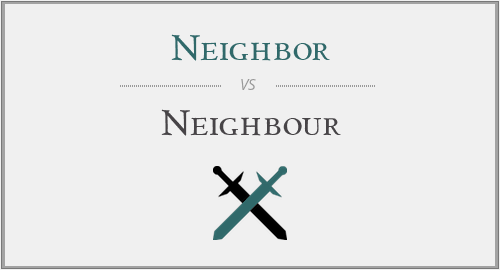

#### 1.1 Read your dataset (corrected format, star formation)!
- print columns
- print the head(3)!

In [2]:
cat = pd.read_csv('C:/Users/georg/OneDrive/Kwantlen/PHYS 4900 - Introduction to Data Science/Data/Star_Formation/HiGAL_clump_catalogue_correct_formatting.csv')

In [3]:
cat.columns

Index(['ID', 'DESIGNATION', 'GLON', 'GLAT', 'ra', 'dec', 'DESIGNATION_70',
       'F70', 'DF70', 'F70_TOT', 'DF70_TOT', 'F70_ADD', 'DF70_ADD',
       'F70_ADD_TOT', 'DF70_ADD_TOT', 'ULIM_70', 'DESIGNATION_160', 'F160',
       'DF160', 'F160_ADD', 'DF160_ADD', 'ULIM_160', 'DESIGNATION_250', 'F250',
       'DF250', 'DESIGNATION_350', 'F350', 'DF350', 'FSC350', 'DFSC350',
       'DESIGNATION_500', 'F500', 'DF500', 'FSC500', 'DFSC500',
       'DESIGNATION_21', 'F21', 'DF21', 'F21_TOT', 'DF21_TOT',
       'DESIGNATION_22', 'F22', 'DF22', 'F22_TOT', 'DF22_TOT',
       'DESIGNATION_24', 'F24', 'DF24', 'F24_TOT', 'DF24_TOT',
       'DESIGNATION_870', 'F870', 'DF870', 'DESIGNATION_1100', 'F1100',
       'DF1100', 'DFWHM250', 'DIST', 'NEAR_DIST', 'FAR_DIST', 'DIST_FLAG',
       'DIAM', 'M_LARS', 'FIT_TYPE', 'EVOL_FLAG', 'MASS', 'DMASS', 'TEMP',
       'DTEMP', 'LAM_0_TK', 'L_BOL', 'LRATIO', 'T_BOL', 'SURF_DENS'],
      dtype='object')

In [4]:
cat.head(3)

,ID,DESIGNATION,GLON,GLAT,ra,dec,DESIGNATION_70,F70,DF70,F70_TOT,...,EVOL_FLAG,MASS,DMASS,TEMP,DTEMP,LAM_0_TK,L_BOL,LRATIO,T_BOL,SURF_DENS
0,4454,HIGALBM9.2545+1.0842,9.254488,1.084173,270.54295,-20.408795,-,0.0,0.0,0.0,...,1.0,-7.63,-1.86,10.84,0.48,0.0,-1.19,5.19,16.79,0.073
1,4455,HIGALBM9.2569-0.2825,9.256889,-0.282502,271.81796,-21.076705,-,0.0,0.0,0.0,...,1.0,-30.79,-6.40,10.31,0.42,70.3,-3.38,4.31,15.70,0.551
2,4456,HIGALBM9.2582-0.4725,9.258172,-0.472514,271.99662,-21.167985,-,0.0,0.0,0.0,...,1.0,-10.36,-2.69,12.32,0.66,0.0,-3.49,7.70,19.08,0.105


# Act 2 - KNN - Get Started
#### 2.1 prepare your data by only have these columns:
- cols= ['F70', 'F160', 'F250', 'F350', 'F500', 'F21', 'F22', 'F24', 'F870', 'F1100']
- Also, for now let's not worry about where EVOL_FLAG equals to 0. Also, exclude them

In [5]:
x = cat[['F70', 'F160', 'F250', 'F350', 'F500', 'F21', 'F22', 'F24', 'F870', 'F1100']][cat['EVOL_FLAG'] != 0]

y = cat['EVOL_FLAG'][cat['EVOL_FLAG'] != 0]

#### 2.2 Perform your train_test_split! and print out X dataset!

In [6]:
x

,F70,F160,F250,F350,F500,F21,F22,F24,F870,F1100
0,0.000,0.000,4.852,3.755,1.703,0.0,0.000,0.000,0.00,0.0
1,0.000,3.454,11.413,6.738,10.814,0.0,0.000,0.000,0.00,0.0
2,0.000,0.000,9.697,6.108,2.948,0.0,0.000,0.000,0.00,0.0
3,0.000,1.229,8.061,4.141,5.217,0.0,0.000,0.000,0.00,0.0
4,0.000,0.000,30.386,10.795,5.831,0.0,0.000,0.000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
1726,0.000,6.327,15.921,8.838,3.416,0.0,0.000,0.000,0.00,0.0
1728,0.494,1.732,2.816,2.499,2.009,0.0,0.000,0.003,0.15,0.0
1729,0.000,6.936,8.044,4.126,2.537,0.0,0.000,0.000,0.00,0.0
1730,17.853,27.037,38.971,21.206,10.956,0.0,1.763,1.604,0.86,0.0


In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.33, random_state = 42)

#### 2.3 Scaling
- Perform the scaling!

**Do we fit the scaling model on the X_test or we only tranform the model from training set to the test? Why?** 

- Print out your scaled X_train (Note: you may need to convert it to a dataframe)
- Print out your scaled X_test (Note: you may need to convert it to a dataframe)

In [8]:
scal = StandardScaler()

scaledxtrain = pd.DataFrame(scal.fit_transform(xtrain), columns = x.columns)
scaledxtest = pd.DataFrame(scal.transform(xtest), columns = x.columns)

In [9]:
scaledxtrain

,F70,F160,F250,F350,F500,F21,F22,F24,F870,F1100
0,-0.17445,-0.264367,-0.280474,-0.298848,-0.261318,-0.05591,-0.112709,0.107909,-0.288356,0.0
1,-0.17445,-0.264367,-0.003510,0.148299,0.130428,-0.05591,-0.112709,0.107909,-0.288356,0.0
2,-0.17445,-0.225383,-0.323906,-0.310588,-0.305237,-0.05591,-0.112709,0.107909,-0.288356,0.0
3,-0.17445,-0.229354,-0.344466,-0.348813,-0.364255,-0.05591,-0.112709,0.107909,-0.288356,0.0
4,-0.17445,-0.264367,-0.321570,-0.122806,0.010715,-0.05591,-0.112709,0.107909,-0.110035,0.0
...,...,...,...,...,...,...,...,...,...,...
1093,-0.17445,-0.237680,-0.359369,-0.274867,-0.117688,-0.05591,-0.112709,0.107909,-0.288356,0.0
1094,-0.17445,-0.149379,-0.157174,0.106427,0.113953,-0.05591,-0.112709,0.107909,0.328691,0.0
1095,-0.17445,-0.264367,-0.359795,-0.353041,-0.355566,-0.05591,-0.112709,0.107909,-0.288356,0.0
1096,-0.17445,-0.264367,-0.304374,-0.292417,-0.326444,-0.05591,-0.112709,0.107909,-0.288356,0.0


In [10]:
scaledxtest

,F70,F160,F250,F350,F500,F21,F22,F24,F870,F1100
0,-0.174450,-0.226207,-0.317104,-0.322128,-0.353329,-0.055910,-0.112709,0.107909,-0.288356,0.0
1,-0.174450,-0.264367,-0.287429,-0.246217,-0.301452,-0.055910,-0.112709,0.107909,-0.288356,0.0
2,0.688900,0.181843,0.498054,0.743199,-0.431876,0.145653,0.919954,0.152174,0.299820,0.0
3,-0.174450,-0.161342,-0.162567,-0.055450,-0.139454,-0.055910,-0.112709,0.107909,0.198488,0.0
4,-0.170394,-0.253272,-0.339530,-0.324091,-0.309797,-0.055910,-0.112709,0.107909,-0.288356,0.0
...,...,...,...,...,...,...,...,...,...,...
537,-0.174450,-0.236593,-0.326647,-0.310468,-0.322745,-0.055910,-0.112709,0.107909,-0.288356,0.0
538,-0.098559,-0.107442,-0.226079,-0.229228,-0.132012,-0.055910,-0.112709,0.109334,-0.288356,0.0
539,0.031483,-0.022121,-0.180528,-0.221796,-0.202730,-0.055910,0.083015,0.125184,-0.288356,0.0
540,-0.146449,-0.215313,-0.194601,-0.231532,-0.431876,-0.055910,-0.095662,0.108538,-0.288356,0.0


# Act 3 - Perform KNN
#### 3.1 Do it for k=2

In [11]:
KNN = KNeighborsClassifier(n_neighbors=2)

In [12]:
KNN.fit(scaledxtrain, ytrain)

KNeighborsClassifier(n_neighbors=2)

In [13]:
pred = KNN.predict(scaledxtest)

#### 3.2 Think about how we can determine the error? Maybe you would have a better way than how I would approach! So, feel free to educate me!
- Is MSE a good aproach? Let's say your class is 0 and predict 2! How is this different from predicting 1 for class 0? Our model was incorrect in both cases! So, maybe MSE is not the best way!
- What if for now we simply count the number of times when y_test and our prediction do not match?
- Maybe not a bad idea to take its mean!

In [14]:
np.mean(np.abs(ytest-pred))

0.21033210332103322

# Act 4 - Perform KNN for i in range(1,40)
#### 4.1 Perform KNN for i in range(1,40)

#### 4.2 Create a plot of Error vs K Number. Make your plot as close as possible to the one below!

Text(0, 0.5, 'Error')

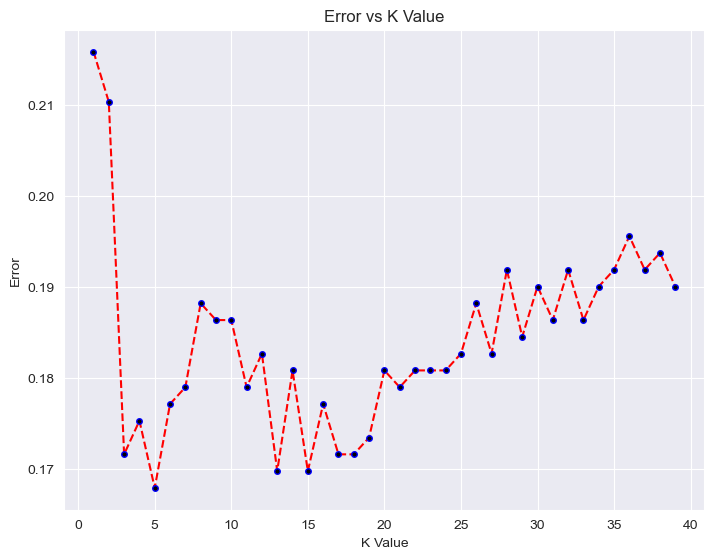

In [15]:
sb.set_style('darkgrid')
K = np.arange(1,40)
error = [0]*39
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(scaledxtrain, ytrain)
    pred = KNN.predict(scaledxtest)
    error[i-1] = np.mean(np.abs(ytest-pred))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(K, error
        , c = 'r'
        , ls = '--'
        , marker = 'o'
        , markersize = 4
        , markerfacecolor = 'black'
        , markeredgewidth = 1
        , markeredgecolor = 'blue')
ax.set_title('Error vs K Value')
ax.set_xlabel('K Value')
ax.set_ylabel("Error")

#### 4.3 Redo it for the minimum cvalue and print out the classification report and confusion matrix

In [16]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(scaledxtrain, ytrain)
pred = KNN.predict(scaledxtest)

In [17]:
print(confusion_matrix(ytest, pred), '\n')
print(classification_report(ytest, pred))

[[246  27]
 [ 64 205]] 

              precision    recall  f1-score   support

         1.0       0.79      0.90      0.84       273
         2.0       0.88      0.76      0.82       269

    accuracy                           0.83       542
   macro avg       0.84      0.83      0.83       542
weighted avg       0.84      0.83      0.83       542



# Act 5 - What if we include class zeros?
#### 5.1 Copy and paste your work from above! Try to have most of them in one cell! 

In [18]:
x = cat[['F70', 'F160', 'F250', 'F350', 'F500', 'F21', 'F22', 'F24', 'F870', 'F1100']]

y = cat['EVOL_FLAG']

Text(0, 0.5, 'Error')

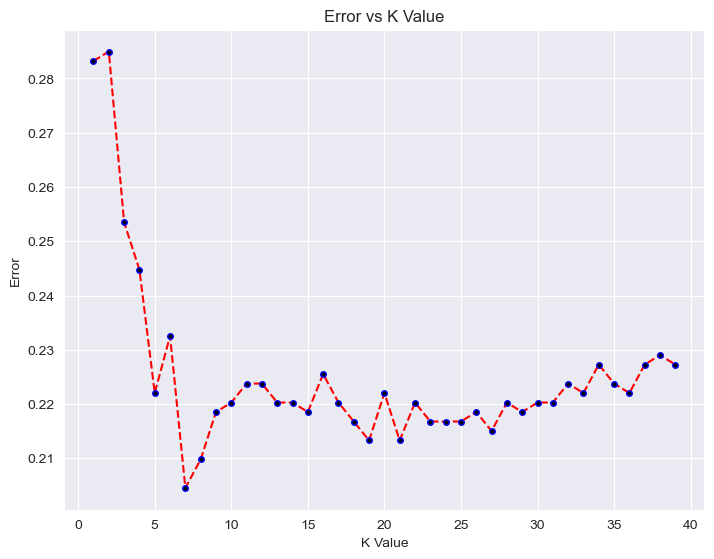

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.33, random_state = 42)

scal = StandardScaler()
scaledxtrain = pd.DataFrame(scal.fit_transform(xtrain), columns = x.columns)
scaledxtest = pd.DataFrame(scal.transform(xtest), columns = x.columns)

sb.set_style('darkgrid')
K = np.arange(1,40)
error = [0]*39
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(scaledxtrain, ytrain)
    pred = KNN.predict(scaledxtest)
    error[i-1] = np.mean(np.abs(ytest-pred))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(K, error
        , c = 'r'
        , ls = '--'
        , marker = 'o'
        , markersize = 4
        , markerfacecolor = 'black'
        , markeredgewidth = 1
        , markeredgecolor = 'blue')
ax.set_title('Error vs K Value')
ax.set_xlabel('K Value')
ax.set_ylabel("Error")

#### 5.2 For the minimum value run it again and print the classification report and confusion matrix

In [20]:
KNN = KNeighborsClassifier(n_neighbors=7)

KNN.fit(scaledxtrain, ytrain)
pred = KNN.predict(scaledxtest)

print(confusion_matrix(ytest, pred), '\n')
print(classification_report(ytest, pred))

[[ 12  12   1]
 [ 13 242  30]
 [  1  58 203]] 

              precision    recall  f1-score   support

         0.0       0.46      0.48      0.47        25
         1.0       0.78      0.85      0.81       285
         2.0       0.87      0.77      0.82       262

    accuracy                           0.80       572
   macro avg       0.70      0.70      0.70       572
weighted avg       0.80      0.80      0.80       572



# $\Large Well, \ not \ the \ best \ of \ our \ work, \ I \ guess!$

# Act 6 - Maybe we didn't spend enough time understanding the data! Let's do some more plotting!

#### 6.1 Can you create the following barplot of the mean value? 
Hint: you may need to use order option via sns.barplot

In [21]:
x.columns

Index(['F70', 'F160', 'F250', 'F350', 'F500', 'F21', 'F22', 'F24', 'F870',
       'F1100'],
      dtype='object')

<AxesSubplot: >

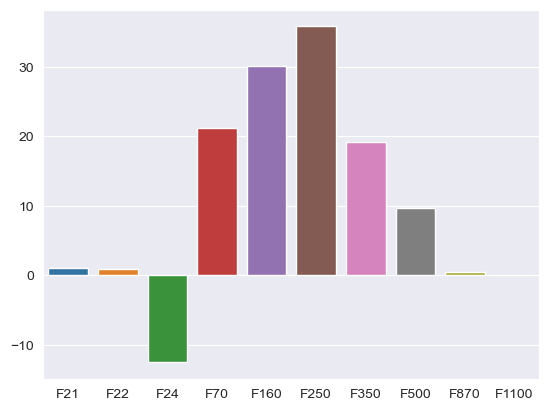

In [22]:
sb.barplot(data = x,
           order = ['F21', 'F22', 'F24', 'F70', 'F160', 'F250', 'F350', 'F500', 'F870', 'F1100'],
           errorbar = None)

#### 6.2 How does the box plot of the non-scaled X_train and scaled version of X_train look?

<AxesSubplot: >

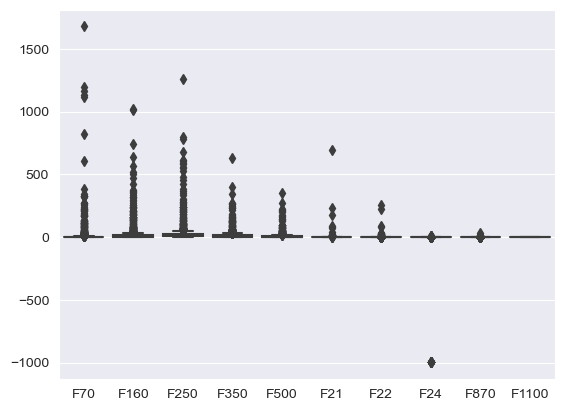

In [23]:
sb.boxplot(xtrain)

<AxesSubplot: >

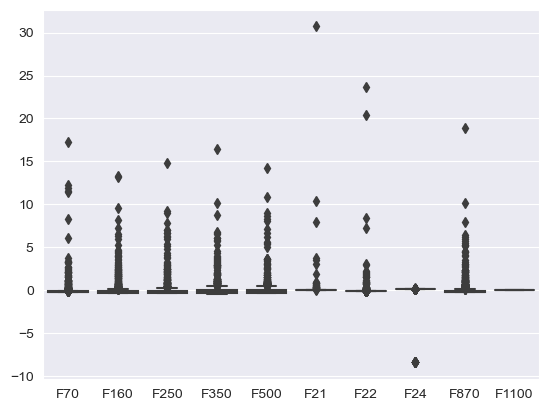

In [24]:
sb.boxplot(scaledxtrain)

#### 6.3 What if we create two dataframes:
- 1. X + the Evolutionary Flag --> I called it 'df'
- 2. scaled X_train + the Evolutionary Flag --> I called it 'df_scal'

In [25]:
ytrain

468     1.0
155     1.0
1399    2.0
1209    1.0
1047    1.0
       ... 
1130    2.0
1294    1.0
860     0.0
1459    2.0
1126    0.0
Name: EVOL_FLAG, Length: 1160, dtype: float64

In [26]:
df=xtrain.reset_index(drop=True)
ytrain_reind = ytrain.reset_index(drop = True)
df['EVOL_FLAG'] = ytrain_reind
df

,F70,F160,F250,F350,F500,F21,F22,F24,F870,F1100,EVOL_FLAG
0,0.000,0.000,7.297,7.959,2.968,0.0,0.015,0.000,0.000,0.0,1.0
1,0.000,6.727,11.052,5.913,2.201,0.0,0.000,0.000,0.000,0.0,1.0
2,6.618,19.262,34.338,10.581,7.282,0.0,0.000,0.000,0.000,0.0,2.0
3,0.000,6.900,9.612,5.142,6.002,0.0,0.000,0.000,0.000,0.0,1.0
4,0.000,8.339,15.434,10.159,16.174,0.0,0.000,0.000,0.000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1155,14.791,33.569,35.629,15.481,9.182,0.0,0.000,0.002,0.403,0.0,2.0
1156,0.000,0.000,6.297,9.472,4.631,0.0,0.000,0.000,0.000,0.0,1.0
1157,0.000,8.108,10.783,4.562,1.241,0.0,0.000,0.000,0.000,0.0,0.0
1158,0.000,38.417,26.676,20.150,13.718,0.0,0.000,-999.000,0.412,0.0,2.0


In [27]:
df_scal = pd.DataFrame(scaledxtrain, columns=scaledxtrain.columns)

df_scal['EVOL_FLAG'] = df['EVOL_FLAG']

df_scal

,F70,F160,F250,F350,F500,F21,F22,F24,F870,F1100,EVOL_FLAG
0,-0.183652,-0.336886,-0.314141,-0.258221,-0.285505,-0.062407,-0.091254,0.117131,-0.296554,0.0,1.0
1,-0.183652,-0.247361,-0.268883,-0.312953,-0.317402,-0.062407,-0.092647,0.117131,-0.296554,0.0,1.0
2,-0.114975,-0.080542,0.011775,-0.188082,-0.106097,-0.062407,-0.092647,0.117131,-0.296554,0.0,2.0
3,-0.183652,-0.245059,-0.286239,-0.333577,-0.159329,-0.062407,-0.092647,0.117131,-0.296554,0.0,1.0
4,-0.183652,-0.225908,-0.216068,-0.199370,0.263696,-0.062407,-0.092647,0.117131,-0.296554,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1155,-0.030161,0.109861,0.027335,-0.057004,-0.027082,-0.062407,-0.092647,0.117148,-0.040510,0.0,2.0
1156,-0.183652,-0.336886,-0.326193,-0.217748,-0.216345,-0.062407,-0.092647,0.117131,-0.296554,0.0,1.0
1157,-0.183652,-0.228983,-0.272125,-0.349093,-0.357326,-0.062407,-0.092647,0.117131,-0.296554,0.0,0.0
1158,-0.183652,0.174379,-0.080573,0.067893,0.161558,-0.062407,-0.092647,-8.455662,-0.034792,0.0,2.0


#### 6.4 Create the following plot ['F70', 'F160', 'F250', 'F350', 'F500']

In [28]:
x.columns

Index(['F70', 'F160', 'F250', 'F350', 'F500', 'F21', 'F22', 'F24', 'F870',
       'F1100'],
      dtype='object')

In [36]:
df['EVOL_FLAG'].value_counts()

1.0    584
2.0    509
0.0     67
Name: EVOL_FLAG, dtype: int64

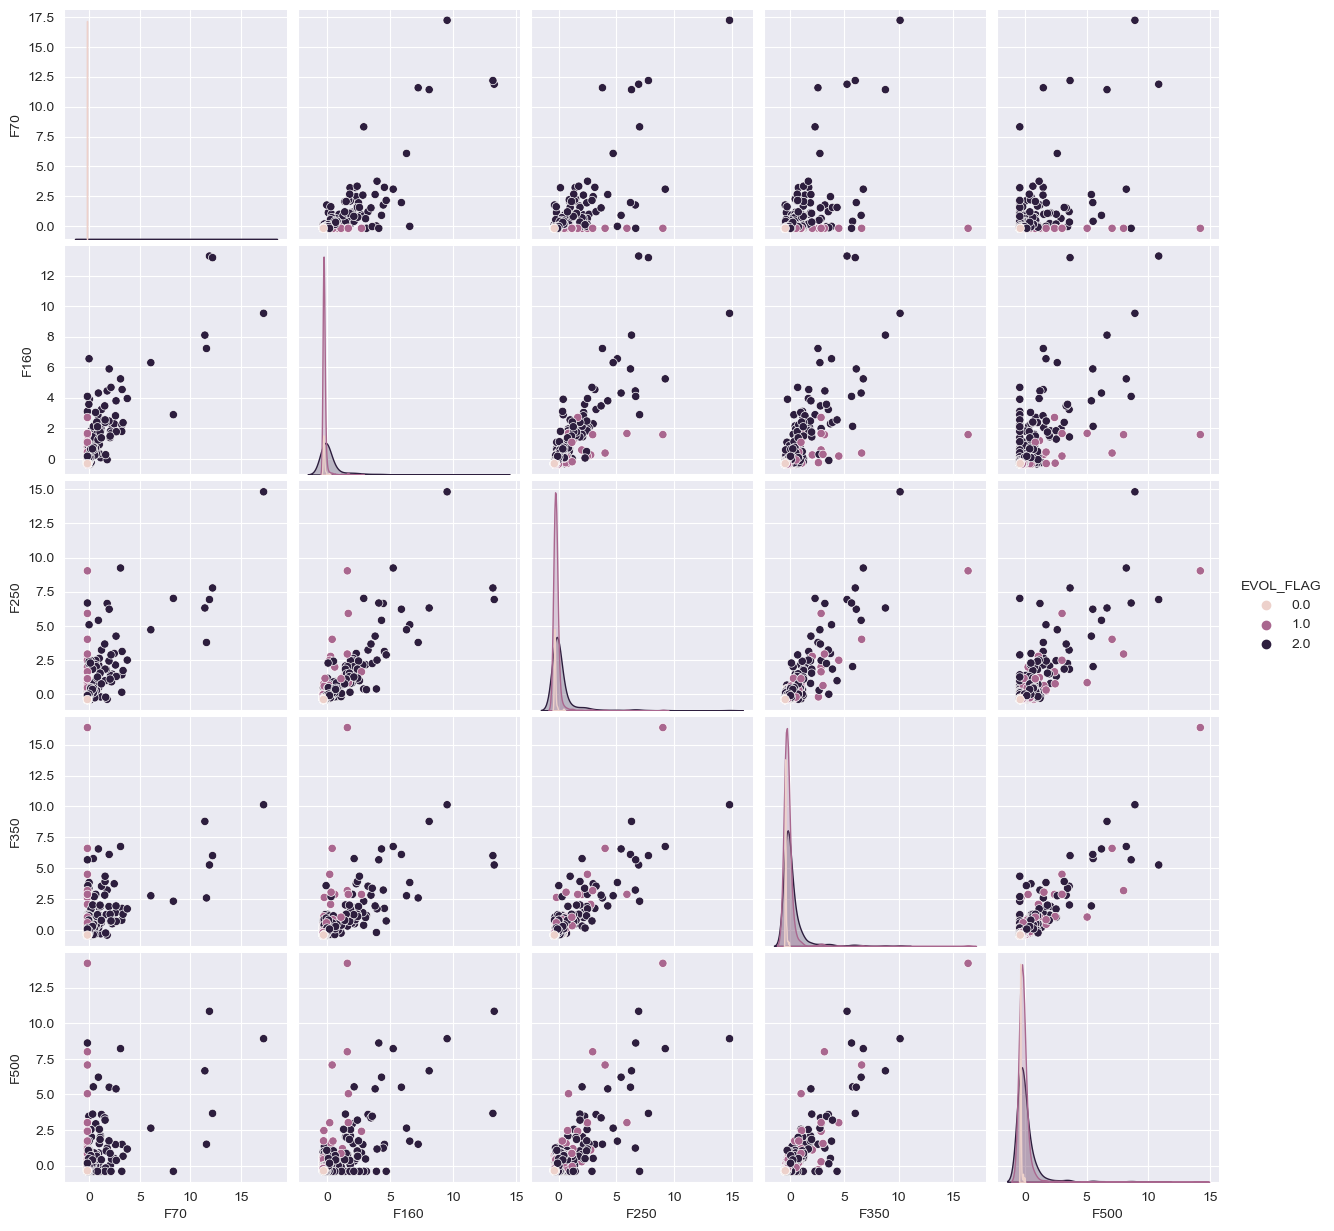

In [28]:
sb.pairplot(data = df_scal[['F70', 'F160', 'F250', 'F350', 'F500', 'EVOL_FLAG']],
            hue = 'EVOL_FLAG')

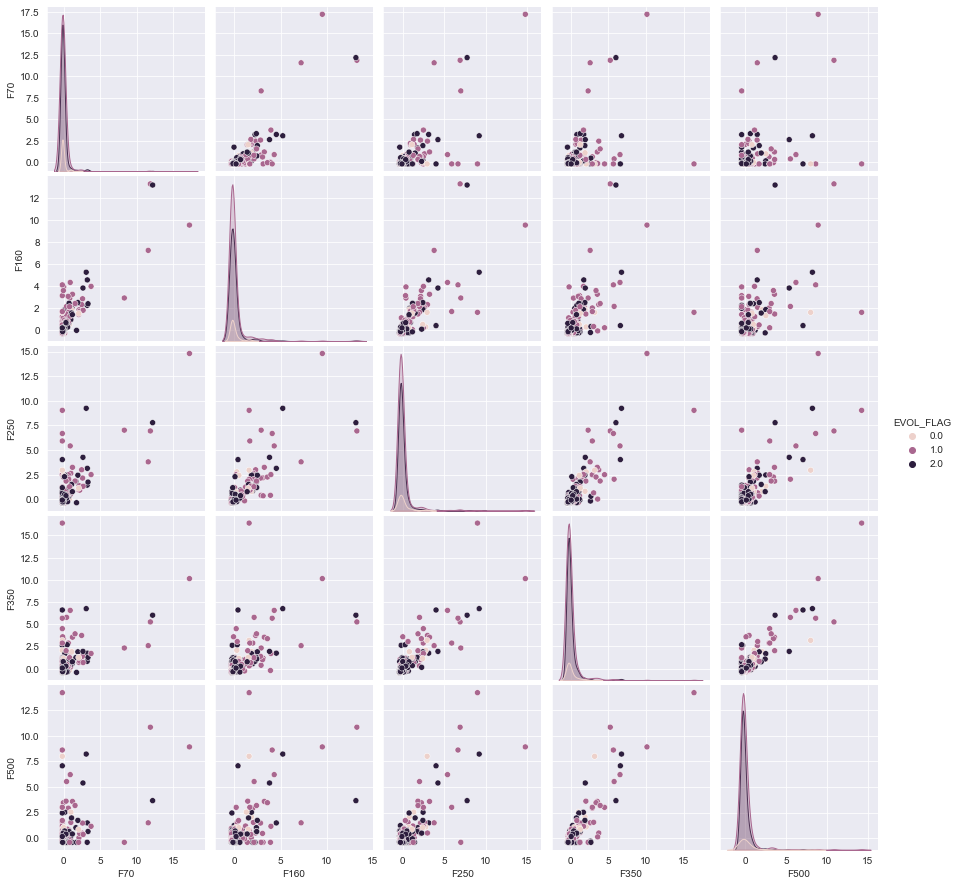

#### 6.5 Let's look at it closer! Create the following plots.

(-1.0, 5.0)

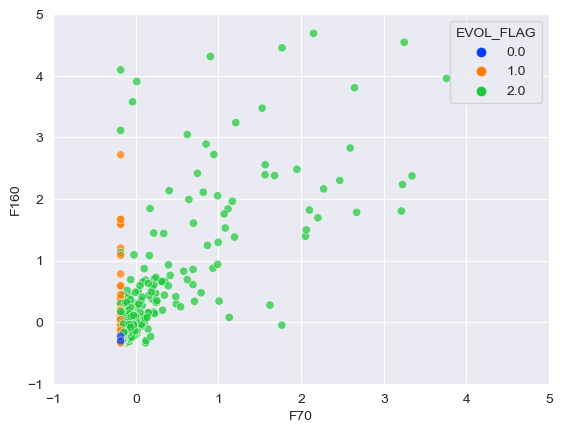

In [54]:
sb.set_style('darkgrid')

sb.scatterplot(data = df_scal[['F70', 'F160', 'EVOL_FLAG']],
               x = 'F70', y = 'F160', hue = 'EVOL_FLAG',
               palette = 'bright',
               alpha = 0.7)

plt.ylim(top = 5, bottom = -1)
plt.xlim(left = -1, right = 5)

(-1.0, 5.0)

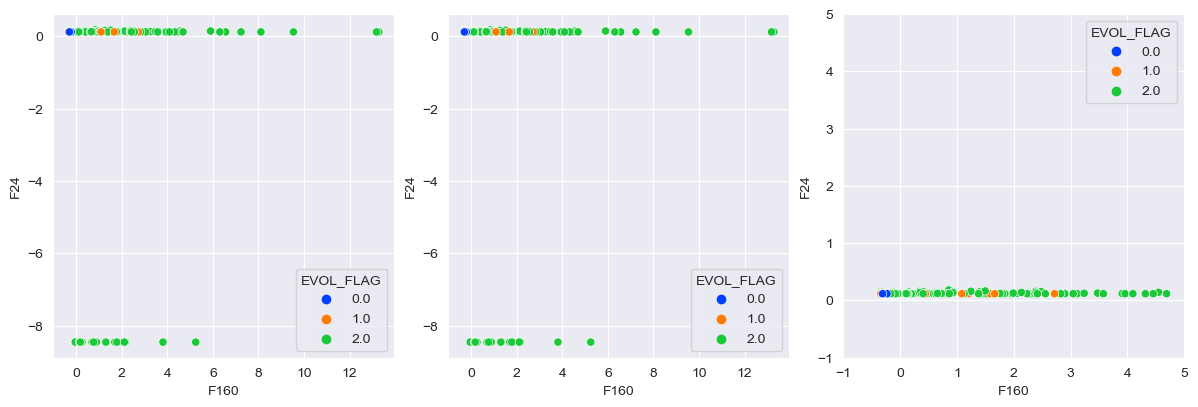

In [59]:
sb.set_style('darkgrid')

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4))
plt.tight_layout()

sb.scatterplot(data = df_scal[['F160', 'F24', 'EVOL_FLAG']],
               x = 'F160', y = 'F24',
               hue = 'EVOL_FLAG', palette = 'bright',
               ax = ax[0])

sb.scatterplot(data = df_scal[['F160', 'F24', 'EVOL_FLAG']],
               x = 'F160', y = 'F24',
               hue = 'EVOL_FLAG', palette = 'bright',
               ax = ax[1])

sb.scatterplot(data = df_scal[['F160', 'F24', 'EVOL_FLAG']],
               x = 'F160', y = 'F24',
               hue = 'EVOL_FLAG', palette = 'bright',
               ax = ax[2])
ax[2].set_ylim(top = 5, bottom = -1)
ax[2].set_xlim(left = -1, right = 5)

# Act 7 - What if we include the rest of the columns?

i.e. ['F70', 'F160', 'F250', 'F350', 'F500','F870', 'F1100', 'DIST', 'DIAM', 'EVOL_FLAG', 'MASS', 'TEMP', 'L_BOL', 'T_BOL', 'SURF_DENS']
#### Seems like maybe we should have got ridden off the F20,F21, F24

#### Also, all those negative values are annoying! So, get rid of all MASS and L_BOL with the negative values

In [87]:
cols = ['F70', 'F160', 'F250', 'F350', 'F500','F870', 'F1100', 'DIST', 'DIAM', 'EVOL_FLAG', 'MASS', 'TEMP', 'L_BOL', 'T_BOL', 'SURF_DENS']
cat7 = cat[cols][(cat['MASS']>=0) & (cat['L_BOL']>=0)]
cat7

,F70,F160,F250,F350,F500,F870,F1100,DIST,DIAM,EVOL_FLAG,MASS,TEMP,L_BOL,T_BOL,SURF_DENS
845,0.000,0.000,11.836,7.173,5.579,0.00,0.0,4728.0,0.921,1.0,463.30,10.84,72.48,16.79,0.145
846,0.000,11.270,15.777,6.003,3.690,0.00,0.0,9042.0,1.417,1.0,610.66,14.76,608.98,22.87,0.081
847,64.853,47.596,58.762,118.294,0.000,1.07,0.0,8187.0,0.544,2.0,2096.65,15.59,9780.92,45.59,1.886
848,0.000,0.000,5.582,6.394,2.563,0.00,0.0,4579.0,0.471,1.0,99.03,13.82,66.40,21.40,0.119
849,1.526,5.064,19.108,37.407,26.121,1.08,0.0,6149.0,0.660,2.0,2745.00,9.96,374.50,25.96,1.674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,41.844,27.723,67.142,23.870,11.792,0.00,0.0,8856.0,1.447,2.0,2645.15,13.52,13527.37,53.74,0.336
1723,0.000,6.743,43.202,14.557,5.967,0.00,0.0,8048.0,1.853,1.0,2749.98,10.72,402.26,16.61,0.213
1724,3.660,13.021,11.605,4.777,0.000,0.00,0.0,8600.0,1.143,2.0,207.83,18.44,1162.37,35.74,0.042
1727,0.000,0.000,2.473,1.090,0.864,0.00,0.0,4373.0,0.536,0.0,30.10,13.51,17.60,20.92,0.028


#### 7.2 How many EVOL_FLAG == 0 is left?

In [88]:
cat7[cat7['EVOL_FLAG'] == 0].count()

F70          27
F160         27
F250         27
F350         27
F500         27
F870         27
F1100        27
DIST         27
DIAM         27
EVOL_FLAG    27
MASS         27
TEMP         27
L_BOL        27
T_BOL        27
SURF_DENS    27
dtype: int64

#### 7.3 I dont' think we need them in our data set!

In [89]:
cat7 = cat7[cat7['EVOL_FLAG'] != 0]

#### 7.4 Perform KNN for K=1-40 on your new dataset! Note that this time we are including all the columns as above!

Text(0, 0.5, 'Error')

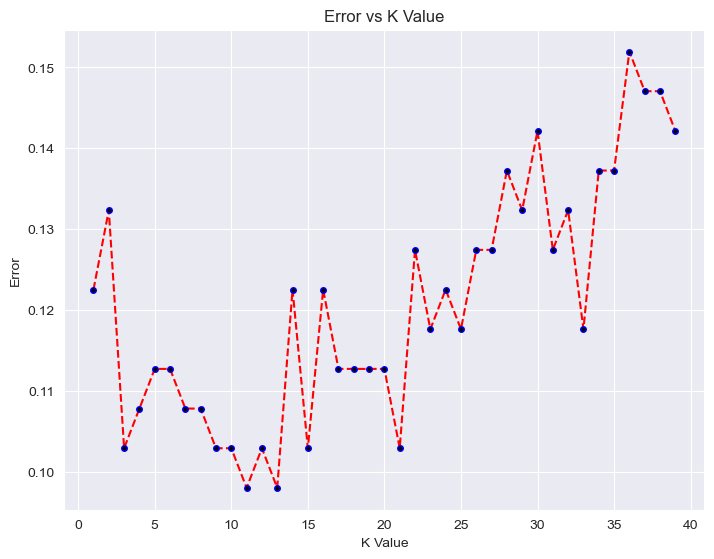

In [91]:
x = cat7[['F70', 'F160', 'F250', 'F350', 'F500','F870', 'F1100', 'DIST', 'DIAM', 'MASS', 'TEMP', 'L_BOL', 'T_BOL', 'SURF_DENS']]
y = cat7['EVOL_FLAG']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.33, random_state = 42)

scal = StandardScaler()
scaledxtrain = pd.DataFrame(scal.fit_transform(xtrain), columns = x.columns)
scaledxtest = pd.DataFrame(scal.transform(xtest), columns = x.columns)

sb.set_style('darkgrid')
K = np.arange(1,40)
error = [0]*39
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(scaledxtrain, ytrain)
    pred = KNN.predict(scaledxtest)
    error[i-1] = np.mean(np.abs(ytest-pred))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(K, error
        , c = 'r'
        , ls = '--'
        , marker = 'o'
        , markersize = 4
        , markerfacecolor = 'black'
        , markeredgewidth = 1
        , markeredgecolor = 'blue')
ax.set_title('Error vs K Value')
ax.set_xlabel('K Value')
ax.set_ylabel("Error")

#### 7.5 Look at the classification report and confusion matrix!

In [92]:
print(confusion_matrix(ytest, pred), '\n')
print(classification_report(ytest, pred))

[[78  4]
 [25 97]] 

              precision    recall  f1-score   support

         1.0       0.76      0.95      0.84        82
         2.0       0.96      0.80      0.87       122

    accuracy                           0.86       204
   macro avg       0.86      0.87      0.86       204
weighted avg       0.88      0.86      0.86       204



#### How do you compare it to your work in Act 4.3?

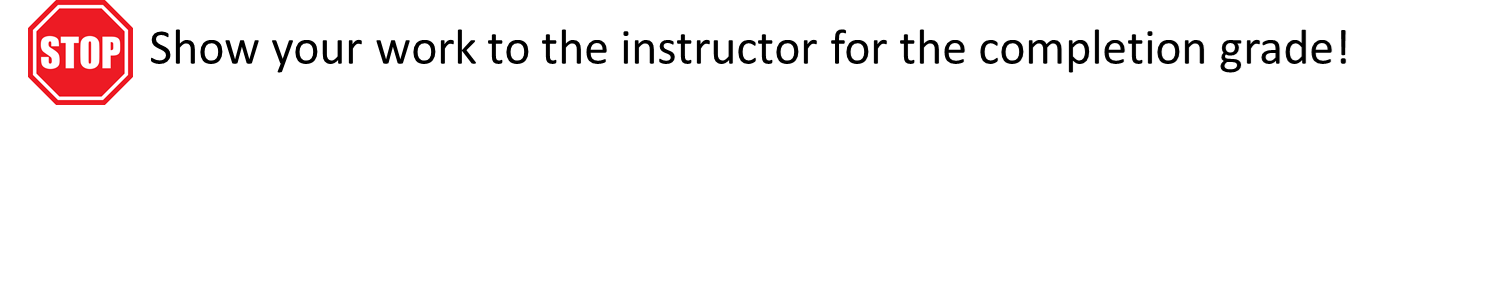